In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time

In [3]:

URL='https://www.cars24.com/buy-used-car/?sort=P&storeCityId=5732&page=5'

In [4]:
page=requests.get(URL)

In [5]:
page.status_code

200

In [6]:
pagecontent=page.text

In [7]:
pagecontent

'<!DOCTYPE html>\n\n<html lang="en">\n\n<head><meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" />\n  <meta property="fb:app_id" content="697234207046254" /><!--scripts from helmet--><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/" rel="canonical"/><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/amp/" rel="amphtml"/><script data-react-helmet="true" type="text/javascript">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n          new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n          j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n          \'//www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n          })(window,document,\'script\',\'dataLayer\',\'GTM-P3C9RJ\');</script><script data-react-helmet="true" type="text/javascript">(function(a,s,y,n,c,h,i,d,e){s.c

In [8]:
soup=BeautifulSoup(pagecontent)

In [9]:
soup

<!DOCTYPE html>
<html lang="en">
<head><meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="697234207046254" property="fb:app_id"/><!--scripts from helmet--><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/" rel="canonical"/><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/amp/" rel="amphtml"/><script data-react-helmet="true" type="text/javascript">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
          new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
          j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
          '//www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
          })(window,document,'script','dataLayer','GTM-P3C9RJ');</script><script data-react-helmet="true" type="text/javascript">(function(a,s,y,n,c,h,i,d,e){s.className+=' '+y;h.start=1*new Date;


In [10]:
Companyname=[]
Modelname=[]
OriginalPrice=[]
DiscountedPrice=[]
Features=[]
EMI=[]
pagenum=[]
City = []

City_code=[4709,2,3686,134,2378,5732]


for i in range(1,15):
    start_time=time.time()
    for j in City_code:
        URL='https://www.cars24.com/buy-used-car/?sort=P&storeCityId={}&page={}'.format(j,i)
        page=requests.get(URL)
        pagecontent=page.text
        soup=BeautifulSoup(pagecontent)
        for x in soup.find_all('div',attrs={'class':'_1l4fi'}):
            cname=x.find('h2',attrs={'class':'_3FpCg'})
            mname=x.find('p',attrs={'class':'cvakB'})
            osp=x.find('p',attrs={'class':'_31Wtw'})
            dsp=x.find('div',attrs={'class':'_7udZZ'})
            specs=x.find('ul',attrs={'class':'bVR0c'})
            em=x.find('div',attrs={'class':'_2HFRN'})



            if cname is None:
                Companyname.append(np.NaN)
            else:
                Companyname.append(cname.text)
            if mname is None:
                Modelname.append(np.NaN)
            else:
                Modelname.append(mname.text)
            if osp is None:
                OriginalPrice.append(np.NaN)
            else:
                OriginalPrice.append(osp.text)
            if dsp is None:
                DiscountedPrice.append(np.NaN)
            else:
                DiscountedPrice.append(dsp.text)
            if specs is None:
                Features.append(np.NaN)
            else:
                Features.append(specs.text)
            if em is None:
                EMI.append(np.NaN)
            else:
                EMI.append(em.text)
            pagenum.append(i)
            City.append(j)
            
        print('Page{} completed in {} secs'.format(i,time.time()-start_time))

Page1 completed in 1.1160640716552734 secs
Page1 completed in 2.140122413635254 secs
Page1 completed in 3.0541746616363525 secs
Page1 completed in 4.0042290687561035 secs
Page1 completed in 4.931282043457031 secs
Page1 completed in 5.731328010559082 secs
Page2 completed in 1.199068546295166 secs
Page2 completed in 2.508143424987793 secs
Page2 completed in 3.5341947078704834 secs
Page2 completed in 4.4761974811553955 secs
Page2 completed in 5.281198740005493 secs
Page2 completed in 6.02620005607605 secs
Page3 completed in 0.900001049041748 secs
Page3 completed in 1.9100024700164795 secs
Page3 completed in 2.790003776550293 secs
Page3 completed in 3.5150046348571777 secs
Page3 completed in 4.625006198883057 secs
Page3 completed in 5.345007419586182 secs
Page4 completed in 0.8850011825561523 secs
Page4 completed in 1.950002670288086 secs
Page4 completed in 2.865003824234009 secs
Page4 completed in 3.705004930496216 secs
Page4 completed in 4.520006418228149 secs
Page4 completed in 5.310007

In [11]:
len(City)

1680

### converting the data into dataframe

In [12]:
df=pd.DataFrame({'Company_Name':Companyname,'Model_Name':Modelname,'Features':Features,'OriginalPrice':OriginalPrice,'EMI':EMI,'DiscountedPrice':DiscountedPrice,
                 'city':City})
df.head(30)

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city
0,2016 Renault Kwid,RXT Opt Manual,411 km1st OwnerPetrol,"₹408,899","₹8,985/month","₹403,899",4709
1,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709
2,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709
3,2011 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"33,686 km3rd OwnerPetrol","₹335,099","₹7,343/month","₹330,099",4709
4,2013 Maruti Ritz,VXI BS IV Manual,"41,507 km1st OwnerPetrol","₹455,899","₹9,318/month","₹418,899",4709
5,2014 Maruti Alto K10,VXI Manual,"40,061 km2nd OwnerPetrol","₹341,099","₹7,165/month","₹322,099",4709
6,2012 Maruti Wagon R 1.0,VXI Manual,"35,022 km1st OwnerPetrol","₹388,399","₹8,328/month","₹374,399",4709
7,2013 Maruti Alto 800,LXI Manual,"37,150 km2nd OwnerPetrol","₹279,099","₹5,875/month","₹264,099",4709
8,2019 Maruti Alto K10,VXI OPT. MT Manual,"12,689 km2nd OwnerPetrol","₹393,199","₹8,235/month","₹370,199",4709
9,2011 Maruti Wagon R 1.0,VXI Manual,"29,575 km1st OwnerPetrol","₹351,899","₹7,717/month","₹346,899",4709


In [13]:
df.shape

(1680, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company_Name     1680 non-null   object
 1   Model_Name       1680 non-null   object
 2   Features         1680 non-null   object
 3   OriginalPrice    1508 non-null   object
 4   EMI              1680 non-null   object
 5   DiscountedPrice  1680 non-null   object
 6   city             1680 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 92.0+ KB


## saving the file as csv file

In [15]:
df.to_csv('carsdata.csv')

## importing the csv file for the modification

In [16]:
car_df = pd.read_csv('carsdata.csv')

In [17]:
car_df

,Unnamed: 0,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city
0,0,2016 Renault Kwid,RXT Opt Manual,411 km1st OwnerPetrol,"₹408,899","₹8,985/month","₹403,899",4709
1,1,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709
2,2,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709
3,3,2011 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"33,686 km3rd OwnerPetrol","₹335,099","₹7,343/month","₹330,099",4709
4,4,2013 Maruti Ritz,VXI BS IV Manual,"41,507 km1st OwnerPetrol","₹455,899","₹9,318/month","₹418,899",4709
...,...,...,...,...,...,...,...,...
1675,1675,2016 Maruti S Cross,ZETA 1.3 Manual,"103,019 km3rd OwnerDiesel","₹634,299","₹13,998/month","₹629,299",5732
1676,1676,2012 Hyundai i10,MAGNA 1.2 KAPPA2 Manual,"94,777 km3rd OwnerPetrol","₹318,299","₹6,813/month","₹306,299",5732
1677,1677,2011 Ford Figo,1.4 TITANIUM DURATORQ Manual,"123,397 km1st OwnerDiesel","₹238,399","₹4,903/month","₹220,399",5732
1678,1678,2013 Maruti Swift Dzire,VXI 1.2 BS IV Manual,"84,775 km1st OwnerPetrol","₹443,799","₹9,583/month","₹430,799",5732


In [18]:
car_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [19]:
car_df

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city
0,2016 Renault Kwid,RXT Opt Manual,411 km1st OwnerPetrol,"₹408,899","₹8,985/month","₹403,899",4709
1,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709
2,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709
3,2011 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"33,686 km3rd OwnerPetrol","₹335,099","₹7,343/month","₹330,099",4709
4,2013 Maruti Ritz,VXI BS IV Manual,"41,507 km1st OwnerPetrol","₹455,899","₹9,318/month","₹418,899",4709
...,...,...,...,...,...,...,...
1675,2016 Maruti S Cross,ZETA 1.3 Manual,"103,019 km3rd OwnerDiesel","₹634,299","₹13,998/month","₹629,299",5732
1676,2012 Hyundai i10,MAGNA 1.2 KAPPA2 Manual,"94,777 km3rd OwnerPetrol","₹318,299","₹6,813/month","₹306,299",5732
1677,2011 Ford Figo,1.4 TITANIUM DURATORQ Manual,"123,397 km1st OwnerDiesel","₹238,399","₹4,903/month","₹220,399",5732
1678,2013 Maruti Swift Dzire,VXI 1.2 BS IV Manual,"84,775 km1st OwnerPetrol","₹443,799","₹9,583/month","₹430,799",5732


## company name column

In [20]:
car_df['company_name'] = car_df.Company_Name.apply(lambda x:x.split()[1])

In [21]:
car_df

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city,company_name
0,2016 Renault Kwid,RXT Opt Manual,411 km1st OwnerPetrol,"₹408,899","₹8,985/month","₹403,899",4709,Renault
1,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709,Maruti
2,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709,Hyundai
3,2011 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"33,686 km3rd OwnerPetrol","₹335,099","₹7,343/month","₹330,099",4709,Hyundai
4,2013 Maruti Ritz,VXI BS IV Manual,"41,507 km1st OwnerPetrol","₹455,899","₹9,318/month","₹418,899",4709,Maruti
...,...,...,...,...,...,...,...,...
1675,2016 Maruti S Cross,ZETA 1.3 Manual,"103,019 km3rd OwnerDiesel","₹634,299","₹13,998/month","₹629,299",5732,Maruti
1676,2012 Hyundai i10,MAGNA 1.2 KAPPA2 Manual,"94,777 km3rd OwnerPetrol","₹318,299","₹6,813/month","₹306,299",5732,Hyundai
1677,2011 Ford Figo,1.4 TITANIUM DURATORQ Manual,"123,397 km1st OwnerDiesel","₹238,399","₹4,903/month","₹220,399",5732,Ford
1678,2013 Maruti Swift Dzire,VXI 1.2 BS IV Manual,"84,775 km1st OwnerPetrol","₹443,799","₹9,583/month","₹430,799",5732,Maruti


# Data Engineering

### model Name Column

In [22]:
car_df['model_name'] = car_df.Company_Name.apply(lambda x: ' '.join(x.split()[2:]))

In [23]:
car_df

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city,company_name,model_name
0,2016 Renault Kwid,RXT Opt Manual,411 km1st OwnerPetrol,"₹408,899","₹8,985/month","₹403,899",4709,Renault,Kwid
1,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709,Maruti,Alto 800
2,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709,Hyundai,i10
3,2011 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"33,686 km3rd OwnerPetrol","₹335,099","₹7,343/month","₹330,099",4709,Hyundai,i10
4,2013 Maruti Ritz,VXI BS IV Manual,"41,507 km1st OwnerPetrol","₹455,899","₹9,318/month","₹418,899",4709,Maruti,Ritz
...,...,...,...,...,...,...,...,...,...
1675,2016 Maruti S Cross,ZETA 1.3 Manual,"103,019 km3rd OwnerDiesel","₹634,299","₹13,998/month","₹629,299",5732,Maruti,S Cross
1676,2012 Hyundai i10,MAGNA 1.2 KAPPA2 Manual,"94,777 km3rd OwnerPetrol","₹318,299","₹6,813/month","₹306,299",5732,Hyundai,i10
1677,2011 Ford Figo,1.4 TITANIUM DURATORQ Manual,"123,397 km1st OwnerDiesel","₹238,399","₹4,903/month","₹220,399",5732,Ford,Figo
1678,2013 Maruti Swift Dzire,VXI 1.2 BS IV Manual,"84,775 km1st OwnerPetrol","₹443,799","₹9,583/month","₹430,799",5732,Maruti,Swift Dzire


## year column

In [26]:
car_df['Year'] = car_df.Company_Name.apply(lambda x:x.split()[0])

In [27]:
car_df

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city,company_name,model_name,Year
0,2021 Ford New Figo,1.2 TITANIUM Manual,335 km1st OwnerPetrol,"₹680,199","₹15,019/month","₹675,199",4709,Ford,New Figo,2021
1,2020 Maruti S PRESSO,VXI AGS Automatic,"5,699 km1st OwnerPetrol","₹492,199","₹10,837/month","₹487,199",4709,Maruti,S PRESSO,2020
2,2010 Maruti Alto,LXI Manual,"32,291 km1st OwnerPetrol","₹234,599","₹5,063/month","₹227,599",4709,Maruti,Alto,2010
3,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709,Maruti,Alto 800,2016
4,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709,Hyundai,i10,2013
...,...,...,...,...,...,...,...,...,...,...
1675,2015 Honda City,V MT PETROL Manual,"79,725 km3rd OwnerPetrol","₹594,199","₹12,528/month","₹563,199",5732,Honda,City,2015
1676,2012 Toyota Etios Liva,GD Manual,"111,086 km1st OwnerDiesel","₹411,699","₹8,758/month","₹393,699",5732,Toyota,Etios Liva,2012
1677,2016 Maruti Swift,VXI Manual,"72,059 km1st OwnerPetrol","₹544,099","₹11,480/month","₹516,099",5732,Maruti,Swift,2016
1678,2016 Volkswagen Polo,HIGHLINE1.2L PETROL Manual,"94,161 km1st OwnerPetrol","₹560,299","₹12,041/month","₹541,299",5732,Volkswagen,Polo,2016


## features columns

### distance

In [28]:
car_df['Kilometers_Driven'] = car_df.Features.apply(lambda x:x.split()[0])

In [29]:
car_df

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city,company_name,model_name,Year,Kilometers_Driven
0,2021 Ford New Figo,1.2 TITANIUM Manual,335 km1st OwnerPetrol,"₹680,199","₹15,019/month","₹675,199",4709,Ford,New Figo,2021,335
1,2020 Maruti S PRESSO,VXI AGS Automatic,"5,699 km1st OwnerPetrol","₹492,199","₹10,837/month","₹487,199",4709,Maruti,S PRESSO,2020,"5,699"
2,2010 Maruti Alto,LXI Manual,"32,291 km1st OwnerPetrol","₹234,599","₹5,063/month","₹227,599",4709,Maruti,Alto,2010,"32,291"
3,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709,Maruti,Alto 800,2016,"6,489"
4,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709,Hyundai,i10,2013,"16,089"
...,...,...,...,...,...,...,...,...,...,...,...
1675,2015 Honda City,V MT PETROL Manual,"79,725 km3rd OwnerPetrol","₹594,199","₹12,528/month","₹563,199",5732,Honda,City,2015,"79,725"
1676,2012 Toyota Etios Liva,GD Manual,"111,086 km1st OwnerDiesel","₹411,699","₹8,758/month","₹393,699",5732,Toyota,Etios Liva,2012,"111,086"
1677,2016 Maruti Swift,VXI Manual,"72,059 km1st OwnerPetrol","₹544,099","₹11,480/month","₹516,099",5732,Maruti,Swift,2016,"72,059"
1678,2016 Volkswagen Polo,HIGHLINE1.2L PETROL Manual,"94,161 km1st OwnerPetrol","₹560,299","₹12,041/month","₹541,299",5732,Volkswagen,Polo,2016,"94,161"


## Owner

In [30]:
car_df['Ow'] = car_df.Features.apply(lambda x: ' '.join(x.split()[1]))

In [31]:
car_df

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city,company_name,model_name,Year,Kilometers_Driven,Ow
0,2021 Ford New Figo,1.2 TITANIUM Manual,335 km1st OwnerPetrol,"₹680,199","₹15,019/month","₹675,199",4709,Ford,New Figo,2021,335,k m 1 s t
1,2020 Maruti S PRESSO,VXI AGS Automatic,"5,699 km1st OwnerPetrol","₹492,199","₹10,837/month","₹487,199",4709,Maruti,S PRESSO,2020,"5,699",k m 1 s t
2,2010 Maruti Alto,LXI Manual,"32,291 km1st OwnerPetrol","₹234,599","₹5,063/month","₹227,599",4709,Maruti,Alto,2010,"32,291",k m 1 s t
3,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709,Maruti,Alto 800,2016,"6,489",k m 1 s t
4,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709,Hyundai,i10,2013,"16,089",k m 2 n d
...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2015 Honda City,V MT PETROL Manual,"79,725 km3rd OwnerPetrol","₹594,199","₹12,528/month","₹563,199",5732,Honda,City,2015,"79,725",k m 3 r d
1676,2012 Toyota Etios Liva,GD Manual,"111,086 km1st OwnerDiesel","₹411,699","₹8,758/month","₹393,699",5732,Toyota,Etios Liva,2012,"111,086",k m 1 s t
1677,2016 Maruti Swift,VXI Manual,"72,059 km1st OwnerPetrol","₹544,099","₹11,480/month","₹516,099",5732,Maruti,Swift,2016,"72,059",k m 1 s t
1678,2016 Volkswagen Polo,HIGHLINE1.2L PETROL Manual,"94,161 km1st OwnerPetrol","₹560,299","₹12,041/month","₹541,299",5732,Volkswagen,Polo,2016,"94,161",k m 1 s t


In [32]:
car_df['Owner'] = car_df.Ow.apply(lambda x:''.join(x.split()[2:]))

In [33]:
car_df.head()

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city,company_name,model_name,Year,Kilometers_Driven,Ow,Owner
0,2021 Ford New Figo,1.2 TITANIUM Manual,335 km1st OwnerPetrol,"₹680,199","₹15,019/month","₹675,199",4709,Ford,New Figo,2021,335,k m 1 s t,1st
1,2020 Maruti S PRESSO,VXI AGS Automatic,"5,699 km1st OwnerPetrol","₹492,199","₹10,837/month","₹487,199",4709,Maruti,S PRESSO,2020,"5,699",k m 1 s t,1st
2,2010 Maruti Alto,LXI Manual,"32,291 km1st OwnerPetrol","₹234,599","₹5,063/month","₹227,599",4709,Maruti,Alto,2010,"32,291",k m 1 s t,1st
3,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709,Maruti,Alto 800,2016,"6,489",k m 1 s t,1st
4,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709,Hyundai,i10,2013,"16,089",k m 2 n d,2nd


### fuel type

In [34]:
car_df['p'] = car_df.Features.apply(lambda x: ' '.join(x.split()[2]))

In [35]:
car_df.head()

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city,company_name,model_name,Year,Kilometers_Driven,Ow,Owner,p
0,2021 Ford New Figo,1.2 TITANIUM Manual,335 km1st OwnerPetrol,"₹680,199","₹15,019/month","₹675,199",4709,Ford,New Figo,2021,335,k m 1 s t,1st,O w n e r P e t r o l
1,2020 Maruti S PRESSO,VXI AGS Automatic,"5,699 km1st OwnerPetrol","₹492,199","₹10,837/month","₹487,199",4709,Maruti,S PRESSO,2020,"5,699",k m 1 s t,1st,O w n e r P e t r o l
2,2010 Maruti Alto,LXI Manual,"32,291 km1st OwnerPetrol","₹234,599","₹5,063/month","₹227,599",4709,Maruti,Alto,2010,"32,291",k m 1 s t,1st,O w n e r P e t r o l
3,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709,Maruti,Alto 800,2016,"6,489",k m 1 s t,1st,O w n e r P e t r o l
4,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709,Hyundai,i10,2013,"16,089",k m 2 n d,2nd,O w n e r P e t r o l


In [36]:
car_df['Fuel_Type'] = car_df.p.apply(lambda x:''.join(x.split()[5:]))

In [37]:
car_df.head()

,Company_Name,Model_Name,Features,OriginalPrice,EMI,DiscountedPrice,city,company_name,model_name,Year,Kilometers_Driven,Ow,Owner,p,Fuel_Type
0,2021 Ford New Figo,1.2 TITANIUM Manual,335 km1st OwnerPetrol,"₹680,199","₹15,019/month","₹675,199",4709,Ford,New Figo,2021,335,k m 1 s t,1st,O w n e r P e t r o l,Petrol
1,2020 Maruti S PRESSO,VXI AGS Automatic,"5,699 km1st OwnerPetrol","₹492,199","₹10,837/month","₹487,199",4709,Maruti,S PRESSO,2020,"5,699",k m 1 s t,1st,O w n e r P e t r o l,Petrol
2,2010 Maruti Alto,LXI Manual,"32,291 km1st OwnerPetrol","₹234,599","₹5,063/month","₹227,599",4709,Maruti,Alto,2010,"32,291",k m 1 s t,1st,O w n e r P e t r o l,Petrol
3,2016 Maruti Alto 800,LXI Manual,"6,489 km1st OwnerPetrol","₹357,499","₹7,463/month","₹335,499",4709,Maruti,Alto 800,2016,"6,489",k m 1 s t,1st,O w n e r P e t r o l,Petrol
4,2013 Hyundai i10,SPORTZ 1.2 KAPPA2 Manual,"16,089 km2nd OwnerPetrol","₹418,099","₹8,678/month","₹390,099",4709,Hyundai,i10,2013,"16,089",k m 2 n d,2nd,O w n e r P e t r o l,Petrol


In [38]:
car_df.drop(['Company_Name','Model_Name','Features','Ow','p'],1,inplace=True)
  

In [39]:
car_df

,OriginalPrice,EMI,DiscountedPrice,city,company_name,model_name,Year,Kilometers_Driven,Owner,Fuel_Type
0,"₹680,199","₹15,019/month","₹675,199",4709,Ford,New Figo,2021,335,1st,Petrol
1,"₹492,199","₹10,837/month","₹487,199",4709,Maruti,S PRESSO,2020,"5,699",1st,Petrol
2,"₹234,599","₹5,063/month","₹227,599",4709,Maruti,Alto,2010,"32,291",1st,Petrol
3,"₹357,499","₹7,463/month","₹335,499",4709,Maruti,Alto 800,2016,"6,489",1st,Petrol
4,"₹418,099","₹8,678/month","₹390,099",4709,Hyundai,i10,2013,"16,089",2nd,Petrol
...,...,...,...,...,...,...,...,...,...,...
1675,"₹594,199","₹12,528/month","₹563,199",5732,Honda,City,2015,"79,725",3rd,Petrol
1676,"₹411,699","₹8,758/month","₹393,699",5732,Toyota,Etios Liva,2012,"111,086",1st,Diesel
1677,"₹544,099","₹11,480/month","₹516,099",5732,Maruti,Swift,2016,"72,059",1st,Petrol
1678,"₹560,299","₹12,041/month","₹541,299",5732,Volkswagen,Polo,2016,"94,161",1st,Petrol


In [40]:
df = car_df.loc[:,['company_name','model_name','Year','Owner','Kilometers_Driven','OriginalPrice','DiscountedPrice','Fuel_Type','EMI','city']]

In [41]:
df

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,city
0,Ford,New Figo,2021,1st,335,"₹680,199","₹675,199",Petrol,"₹15,019/month",4709
1,Maruti,S PRESSO,2020,1st,"5,699","₹492,199","₹487,199",Petrol,"₹10,837/month",4709
2,Maruti,Alto,2010,1st,"32,291","₹234,599","₹227,599",Petrol,"₹5,063/month",4709
3,Maruti,Alto 800,2016,1st,"6,489","₹357,499","₹335,499",Petrol,"₹7,463/month",4709
4,Hyundai,i10,2013,2nd,"16,089","₹418,099","₹390,099",Petrol,"₹8,678/month",4709
...,...,...,...,...,...,...,...,...,...,...
1675,Honda,City,2015,3rd,"79,725","₹594,199","₹563,199",Petrol,"₹12,528/month",5732
1676,Toyota,Etios Liva,2012,1st,"111,086","₹411,699","₹393,699",Diesel,"₹8,758/month",5732
1677,Maruti,Swift,2016,1st,"72,059","₹544,099","₹516,099",Petrol,"₹11,480/month",5732
1678,Volkswagen,Polo,2016,1st,"94,161","₹560,299","₹541,299",Petrol,"₹12,041/month",5732


In [42]:
car_df.shape

(1680, 10)

In [43]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OriginalPrice      1485 non-null   object
 1   EMI                1680 non-null   object
 2   DiscountedPrice    1680 non-null   object
 3   city               1680 non-null   int64 
 4   company_name       1680 non-null   object
 5   model_name         1680 non-null   object
 6   Year               1680 non-null   object
 7   Kilometers_Driven  1680 non-null   object
 8   Owner              1680 non-null   object
 9   Fuel_Type          1680 non-null   object
dtypes: int64(1), object(9)
memory usage: 131.4+ KB


## cleaning part of Data

### DiscountedPrice column

In [44]:
df['DiscountedPrice']=df['DiscountedPrice'].apply(lambda x: x.replace('₹','').replace(',',''))

In [45]:
df.head()

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,city
0,Ford,New Figo,2021,1st,335,"₹680,199",675199,Petrol,"₹15,019/month",4709
1,Maruti,S PRESSO,2020,1st,"5,699","₹492,199",487199,Petrol,"₹10,837/month",4709
2,Maruti,Alto,2010,1st,"32,291","₹234,599",227599,Petrol,"₹5,063/month",4709
3,Maruti,Alto 800,2016,1st,"6,489","₹357,499",335499,Petrol,"₹7,463/month",4709
4,Hyundai,i10,2013,2nd,"16,089","₹418,099",390099,Petrol,"₹8,678/month",4709


### OriginalPrice column

In [46]:
df['OriginalPrice']=car_df['OriginalPrice'].apply(lambda x: str(x).replace('₹','').replace(',',''))

In [47]:
df.head()

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,city
0,Ford,New Figo,2021,1st,335,680199,675199,Petrol,"₹15,019/month",4709
1,Maruti,S PRESSO,2020,1st,"5,699",492199,487199,Petrol,"₹10,837/month",4709
2,Maruti,Alto,2010,1st,"32,291",234599,227599,Petrol,"₹5,063/month",4709
3,Maruti,Alto 800,2016,1st,"6,489",357499,335499,Petrol,"₹7,463/month",4709
4,Hyundai,i10,2013,2nd,"16,089",418099,390099,Petrol,"₹8,678/month",4709


### EMI column

In [48]:
df['EMI']=df['EMI'].apply(lambda x: str(x).replace('₹','').replace(',','').replace('/month',''))

In [49]:
df

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,city
0,Ford,New Figo,2021,1st,335,680199,675199,Petrol,15019,4709
1,Maruti,S PRESSO,2020,1st,"5,699",492199,487199,Petrol,10837,4709
2,Maruti,Alto,2010,1st,"32,291",234599,227599,Petrol,5063,4709
3,Maruti,Alto 800,2016,1st,"6,489",357499,335499,Petrol,7463,4709
4,Hyundai,i10,2013,2nd,"16,089",418099,390099,Petrol,8678,4709
...,...,...,...,...,...,...,...,...,...,...
1675,Honda,City,2015,3rd,"79,725",594199,563199,Petrol,12528,5732
1676,Toyota,Etios Liva,2012,1st,"111,086",411699,393699,Diesel,8758,5732
1677,Maruti,Swift,2016,1st,"72,059",544099,516099,Petrol,11480,5732
1678,Volkswagen,Polo,2016,1st,"94,161",560299,541299,Petrol,12041,5732


In [50]:
df.isnull().sum()

company_name         0
model_name           0
Year                 0
Owner                0
Kilometers_Driven    0
OriginalPrice        0
DiscountedPrice      0
Fuel_Type            0
EMI                  0
city                 0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company_name       1680 non-null   object
 1   model_name         1680 non-null   object
 2   Year               1680 non-null   object
 3   Owner              1680 non-null   object
 4   Kilometers_Driven  1680 non-null   object
 5   OriginalPrice      1680 non-null   object
 6   DiscountedPrice    1680 non-null   object
 7   Fuel_Type          1680 non-null   object
 8   EMI                1680 non-null   object
 9   city               1680 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 131.4+ KB


In [52]:
df=df.apply(pd.to_numeric, errors='ignore')

In [53]:
df

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,city
0,Ford,New Figo,2021,1st,335,680199,675199,Petrol,15019,4709
1,Maruti,S PRESSO,2020,1st,"5,699",492199,487199,Petrol,10837,4709
2,Maruti,Alto,2010,1st,"32,291",234599,227599,Petrol,5063,4709
3,Maruti,Alto 800,2016,1st,"6,489",357499,335499,Petrol,7463,4709
4,Hyundai,i10,2013,2nd,"16,089",418099,390099,Petrol,8678,4709
...,...,...,...,...,...,...,...,...,...,...
1675,Honda,City,2015,3rd,"79,725",594199,563199,Petrol,12528,5732
1676,Toyota,Etios Liva,2012,1st,"111,086",411699,393699,Diesel,8758,5732
1677,Maruti,Swift,2016,1st,"72,059",544099,516099,Petrol,11480,5732
1678,Volkswagen,Polo,2016,1st,"94,161",560299,541299,Petrol,12041,5732


In [54]:
df.dtypes

company_name         object
model_name           object
Year                  int64
Owner                object
Kilometers_Driven    object
OriginalPrice        object
DiscountedPrice       int64
Fuel_Type            object
EMI                   int64
city                  int64
dtype: object

In [55]:
df["OriginalPrice"] = pd.to_numeric(df["OriginalPrice"],errors='coerce')

In [56]:
df.dtypes

company_name          object
model_name            object
Year                   int64
Owner                 object
Kilometers_Driven     object
OriginalPrice        float64
DiscountedPrice        int64
Fuel_Type             object
EMI                    int64
city                   int64
dtype: object

### kilometers_Driven column

In [57]:
df['Kilometers_Driven']=df['Kilometers_Driven'].apply(lambda x: str(x).replace(',',''))

In [58]:
df

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,city
0,Ford,New Figo,2021,1st,335,680199.0,675199,Petrol,15019,4709
1,Maruti,S PRESSO,2020,1st,5699,492199.0,487199,Petrol,10837,4709
2,Maruti,Alto,2010,1st,32291,234599.0,227599,Petrol,5063,4709
3,Maruti,Alto 800,2016,1st,6489,357499.0,335499,Petrol,7463,4709
4,Hyundai,i10,2013,2nd,16089,418099.0,390099,Petrol,8678,4709
...,...,...,...,...,...,...,...,...,...,...
1675,Honda,City,2015,3rd,79725,594199.0,563199,Petrol,12528,5732
1676,Toyota,Etios Liva,2012,1st,111086,411699.0,393699,Diesel,8758,5732
1677,Maruti,Swift,2016,1st,72059,544099.0,516099,Petrol,11480,5732
1678,Volkswagen,Polo,2016,1st,94161,560299.0,541299,Petrol,12041,5732


In [59]:
df["Kilometers_Driven"] = df["Kilometers_Driven"].astype(float)

In [60]:
df

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,city
0,Ford,New Figo,2021,1st,335.0,680199.0,675199,Petrol,15019,4709
1,Maruti,S PRESSO,2020,1st,5699.0,492199.0,487199,Petrol,10837,4709
2,Maruti,Alto,2010,1st,32291.0,234599.0,227599,Petrol,5063,4709
3,Maruti,Alto 800,2016,1st,6489.0,357499.0,335499,Petrol,7463,4709
4,Hyundai,i10,2013,2nd,16089.0,418099.0,390099,Petrol,8678,4709
...,...,...,...,...,...,...,...,...,...,...
1675,Honda,City,2015,3rd,79725.0,594199.0,563199,Petrol,12528,5732
1676,Toyota,Etios Liva,2012,1st,111086.0,411699.0,393699,Diesel,8758,5732
1677,Maruti,Swift,2016,1st,72059.0,544099.0,516099,Petrol,11480,5732
1678,Volkswagen,Polo,2016,1st,94161.0,560299.0,541299,Petrol,12041,5732


In [61]:
df['DiscountedPrice'] = df['DiscountedPrice'].astype(float)

In [62]:
df

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,city
0,Ford,New Figo,2021,1st,335.0,680199.0,675199.0,Petrol,15019,4709
1,Maruti,S PRESSO,2020,1st,5699.0,492199.0,487199.0,Petrol,10837,4709
2,Maruti,Alto,2010,1st,32291.0,234599.0,227599.0,Petrol,5063,4709
3,Maruti,Alto 800,2016,1st,6489.0,357499.0,335499.0,Petrol,7463,4709
4,Hyundai,i10,2013,2nd,16089.0,418099.0,390099.0,Petrol,8678,4709
...,...,...,...,...,...,...,...,...,...,...
1675,Honda,City,2015,3rd,79725.0,594199.0,563199.0,Petrol,12528,5732
1676,Toyota,Etios Liva,2012,1st,111086.0,411699.0,393699.0,Diesel,8758,5732
1677,Maruti,Swift,2016,1st,72059.0,544099.0,516099.0,Petrol,11480,5732
1678,Volkswagen,Polo,2016,1st,94161.0,560299.0,541299.0,Petrol,12041,5732


In [63]:
df['EMI'] = df['EMI'].astype(float)

In [64]:
df.dtypes

company_name          object
model_name            object
Year                   int64
Owner                 object
Kilometers_Driven    float64
OriginalPrice        float64
DiscountedPrice      float64
Fuel_Type             object
EMI                  float64
city                   int64
dtype: object

In [65]:
df.city

0       4709
1       4709
2       4709
3       4709
4       4709
        ... 
1675    5732
1676    5732
1677    5732
1678    5732
1679    5732
Name: city, Length: 1680, dtype: int64

In [66]:
City_code=[4709,2,3686,134,2378,5732]
cities = ['Bangaluru','New Delhi','Hyderabad','Noida','Mumbai','Chennai']
cityname=[]
for value in df.city:
    
    if value==4709:
        cityname.append('Bangaluru')
    elif value==2:
        cityname.append('New Delhi')
    elif value==3686:
        cityname.append('Hyderabad')
    elif value==134:
        cityname.append('Noida')
    elif value==2378:
        cityname.append('Mumbai')
    else:
        cityname.append('Chennai')

In [67]:
df['Location']=cityname

In [68]:
df

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,city,Location
0,Ford,New Figo,2021,1st,335.0,680199.0,675199.0,Petrol,15019.0,4709,Bangaluru
1,Maruti,S PRESSO,2020,1st,5699.0,492199.0,487199.0,Petrol,10837.0,4709,Bangaluru
2,Maruti,Alto,2010,1st,32291.0,234599.0,227599.0,Petrol,5063.0,4709,Bangaluru
3,Maruti,Alto 800,2016,1st,6489.0,357499.0,335499.0,Petrol,7463.0,4709,Bangaluru
4,Hyundai,i10,2013,2nd,16089.0,418099.0,390099.0,Petrol,8678.0,4709,Bangaluru
...,...,...,...,...,...,...,...,...,...,...,...
1675,Honda,City,2015,3rd,79725.0,594199.0,563199.0,Petrol,12528.0,5732,Chennai
1676,Toyota,Etios Liva,2012,1st,111086.0,411699.0,393699.0,Diesel,8758.0,5732,Chennai
1677,Maruti,Swift,2016,1st,72059.0,544099.0,516099.0,Petrol,11480.0,5732,Chennai
1678,Volkswagen,Polo,2016,1st,94161.0,560299.0,541299.0,Petrol,12041.0,5732,Chennai


In [69]:
df.drop(['city'],axis=1,inplace=True)

In [70]:
df

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,Location
0,Ford,New Figo,2021,1st,335.0,680199.0,675199.0,Petrol,15019.0,Bangaluru
1,Maruti,S PRESSO,2020,1st,5699.0,492199.0,487199.0,Petrol,10837.0,Bangaluru
2,Maruti,Alto,2010,1st,32291.0,234599.0,227599.0,Petrol,5063.0,Bangaluru
3,Maruti,Alto 800,2016,1st,6489.0,357499.0,335499.0,Petrol,7463.0,Bangaluru
4,Hyundai,i10,2013,2nd,16089.0,418099.0,390099.0,Petrol,8678.0,Bangaluru
...,...,...,...,...,...,...,...,...,...,...
1675,Honda,City,2015,3rd,79725.0,594199.0,563199.0,Petrol,12528.0,Chennai
1676,Toyota,Etios Liva,2012,1st,111086.0,411699.0,393699.0,Diesel,8758.0,Chennai
1677,Maruti,Swift,2016,1st,72059.0,544099.0,516099.0,Petrol,11480.0,Chennai
1678,Volkswagen,Polo,2016,1st,94161.0,560299.0,541299.0,Petrol,12041.0,Chennai


## data visualisation

In [100]:
df.describe(include = "all")

,company_name,model_name,Year,Owner,Kilometers_Driven,OriginalPrice,DiscountedPrice,Fuel_Type,EMI,Location
count,1680,1680,1680.000000,1680,1680.000000,1.485000e+03,1.680000e+03,1680,1680.000000,1680
unique,21,108,NaN,4,NaN,NaN,NaN,2,NaN,6
top,Maruti,Swift,NaN,1st,NaN,NaN,NaN,Petrol,NaN,Hyderabad
freq,873,118,NaN,1268,NaN,NaN,NaN,1392,NaN,280
mean,NaN,NaN,2015.105952,NaN,44173.046429,4.790436e+05,4.564825e+05,NaN,10154.194643,NaN
std,NaN,NaN,2.944710,NaN,32586.807761,2.278859e+05,2.260780e+05,NaN,5028.989051,NaN
min,NaN,NaN,2007.000000,NaN,335.000000,1.367990e+05,6.600000e+04,NaN,1468.000000,NaN
25%,NaN,NaN,2013.000000,NaN,22192.750000,3.324990e+05,3.120742e+05,NaN,6941.500000,NaN
50%,NaN,NaN,2016.000000,NaN,39228.500000,4.345990e+05,4.161490e+05,NaN,9257.000000,NaN
75%,NaN,NaN,2017.000000,NaN,58513.750000,5.700990e+05,5.422240e+05,NaN,12061.500000,NaN


## Univariate Analysis

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       1680 non-null   object 
 1   model_name         1680 non-null   object 
 2   Year               1680 non-null   int64  
 3   Owner              1680 non-null   object 
 4   Kilometers_Driven  1680 non-null   float64
 5   OriginalPrice      1485 non-null   float64
 6   DiscountedPrice    1680 non-null   float64
 7   Fuel_Type          1680 non-null   object 
 8   EMI                1680 non-null   float64
 9   Location           1680 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 131.4+ KB


### Company Name Columnm

Text(0.5, 1.0, 'Counting of Brands in Company Column')

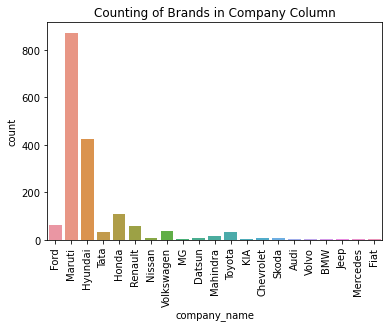

In [73]:
sns.countplot(df.company_name)
plt.xticks(rotation = 90);
plt.title('Counting of Brands in Company Column')

### model_name column

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Swift'),
  Text(1, 0, 'Alto 800'),
  Text(2, 0, 'Wagon R 1.0'),
  Text(3, 0, 'Grand i10'),
  Text(4, 0, 'Alto K10'),
  Text(5, 0, 'i10'),
  Text(6, 0, 'Baleno'),
  Text(7, 0, 'Elite i20'),
  Text(8, 0, 'Swift Dzire'),
  Text(9, 0, 'Celerio')])

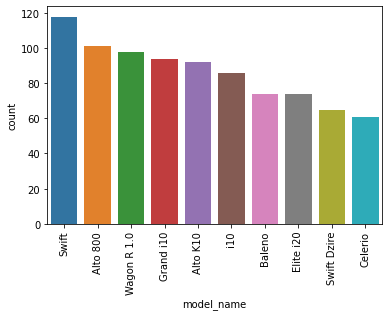

In [102]:
sns.countplot(df["model_name"], order=df['model_name'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

### DiscountedPrice column

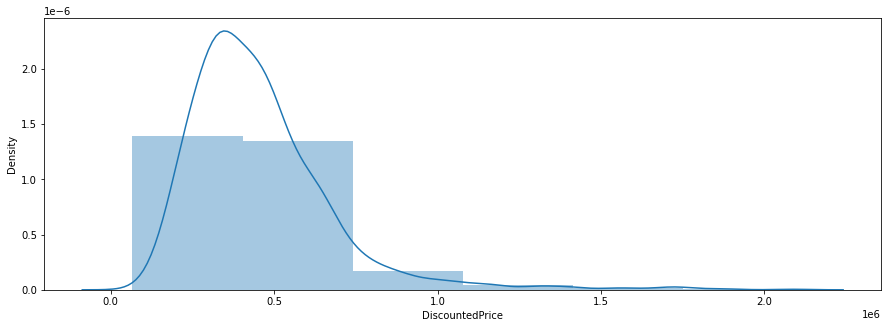

In [75]:
plt.figure(figsize=(15,5))
sns.distplot(df['DiscountedPrice'], bins=6)

plt.show()

### Kilometers_Driven column

<AxesSubplot:xlabel='Kilometers_Driven'>

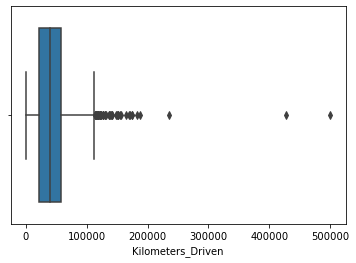

In [76]:
sns.boxplot(df.Kilometers_Driven)

### OriginalPrice

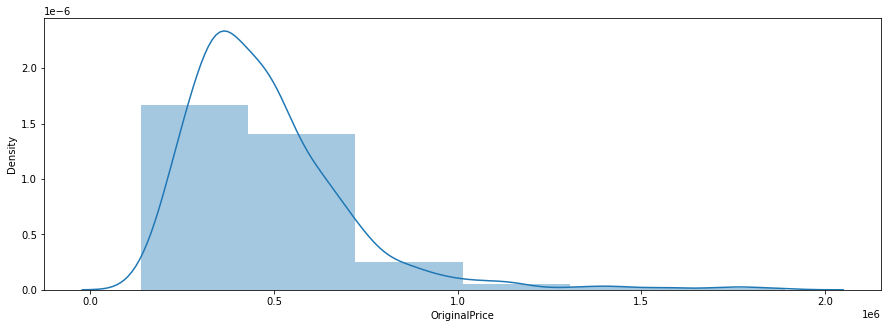

In [77]:
plt.figure(figsize=(15,5))
sns.distplot(df['OriginalPrice'], bins=6)

plt.show()

### Year column

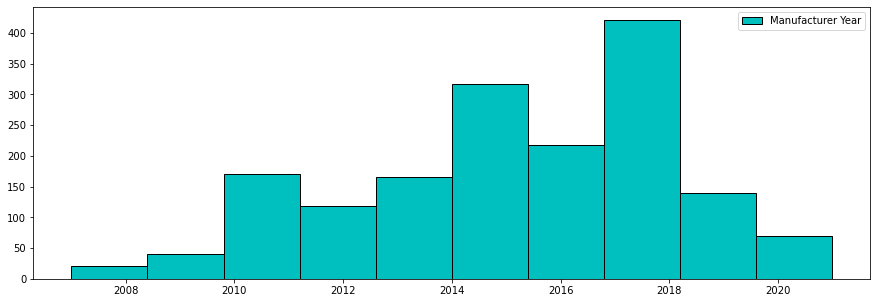

In [78]:
plt.figure(figsize=(15,5))
plt.hist(df['Year'], histtype='bar',align='mid', color='c', 
         label='Manufacturer Year',edgecolor='black')
plt.legend()
plt.show()

### EMI column

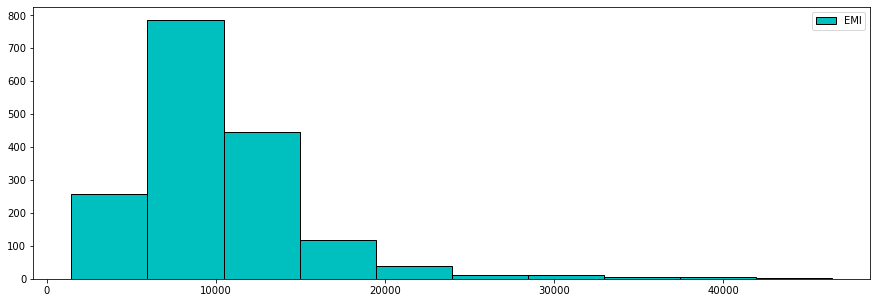

In [79]:
plt.figure(figsize=(15,5))
plt.hist(df['EMI'], histtype='bar',align='mid', color='c', 
         label='EMI',edgecolor='black')
plt.legend()
plt.show()

### Fuel_Type column

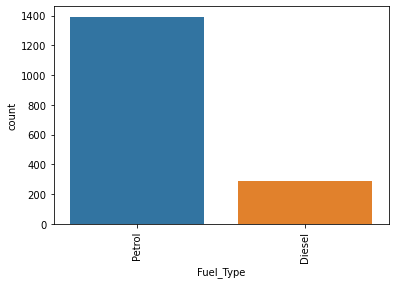

In [80]:
sns.countplot(df.Fuel_Type)
plt.xticks(rotation = 90);


### owner columns

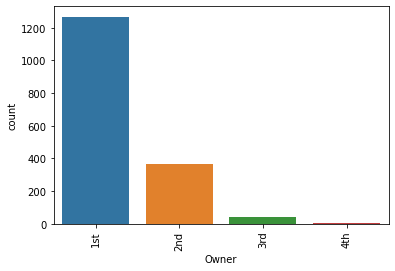

In [81]:
sns.countplot(df.Owner)
plt.xticks(rotation = 90);


### Location column

Text(0.5, 1.0, 'Location of Used_Cars')

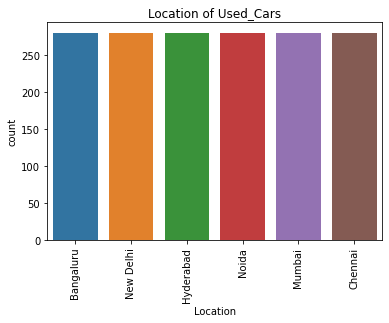

In [82]:
sns.countplot(df.Location)
plt.xticks(rotation = 90);
plt.title('Location of Used_Cars')

## bivariate anylsis

### categotrical vs numerical

## fuel_type vs price

Text(0.5, 1.0, 'Fuel_Type vs Price')

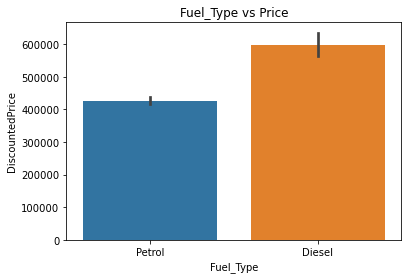

In [83]:
sns.barplot(x="Fuel_Type", y="DiscountedPrice", data =df);
plt.title('Fuel_Type vs Price')

In [84]:
df['company_name'].value_counts()

Maruti        873
Hyundai       423
Honda         109
Ford           62
Renault        56
Volkswagen     37
Toyota         34
Tata           31
Mahindra       16
Datsun          9
Chevrolet       6
Skoda           5
Nissan          5
MG              3
KIA             2
Jeep            2
Audi            2
Mercedes        2
Fiat            1
Volvo           1
BMW             1
Name: company_name, dtype: int64

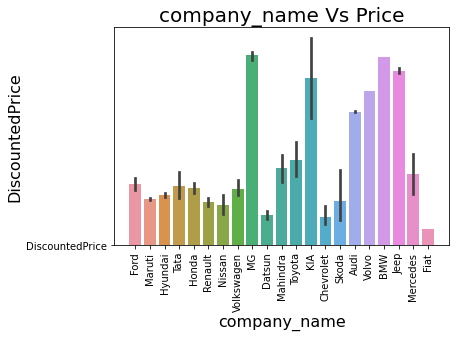

In [85]:
sns.barplot(x="company_name", y="DiscountedPrice", data =df);
plt.bar('company_name','DiscountedPrice',color='skyblue',edgecolor='green')

plt.xlabel('company_name', fontsize=16)
plt.ylabel('DiscountedPrice', fontsize=16)
plt.xticks(rotation=90);
plt.title('company_name Vs Price',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Owner vs Price')

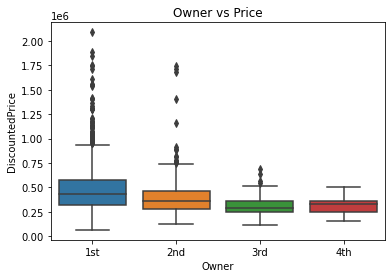

In [86]:
sns.boxplot(x="Owner", y="DiscountedPrice", data =df);
plt.title('Owner vs Price')

Text(0.5, 1.0, 'EMI Alloted According To The Brands Of Companies')

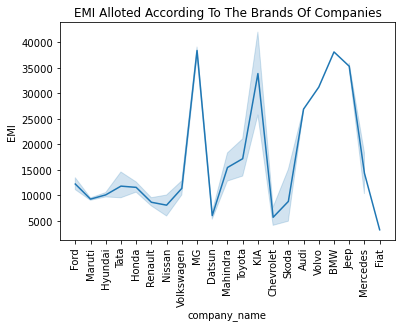

In [87]:
sns.lineplot(x='company_name',y='EMI',data=df)
plt.xticks(rotation=90);
plt.title('EMI Alloted According To The Brands Of Companies')

Text(0.5, 1.0, 'Kilometers_Driven vs Owner')

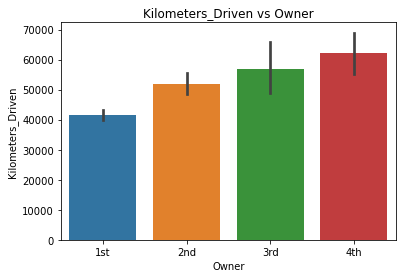

In [88]:
sns.barplot(x="Owner", y="Kilometers_Driven", data =df);
plt.title('Kilometers_Driven vs Owner')

### numerical vs numerical

Text(0.5, 1.0, 'Kilometers_Driven vs Price')

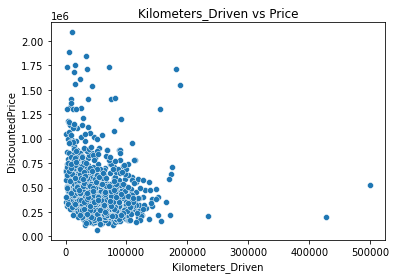

In [89]:
sns.scatterplot(x='Kilometers_Driven',y='DiscountedPrice',data=df)
plt.title('Kilometers_Driven vs Price')

Text(0.5, 1.0, 'manufacturer_year vs Price')

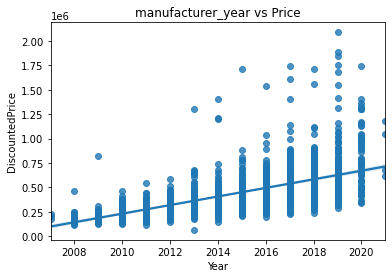

In [90]:
sns.regplot(x='Year',y='DiscountedPrice',data=df)
plt.title('manufacturer_year vs Price')


## categorical vs categorical

In [91]:
com_fuel = pd.crosstab(df['company_name'], df['Fuel_Type'])
com_fuel

Fuel_Type,Diesel,Petrol
company_name,,
Audi,2,0
BMW,1,0
Chevrolet,3,3
Datsun,0,9
Fiat,1,0
Ford,24,38
Honda,9,100
Hyundai,39,384
Jeep,2,0


Text(0.5, 1.0, 'company_name vs Fuel_Type')

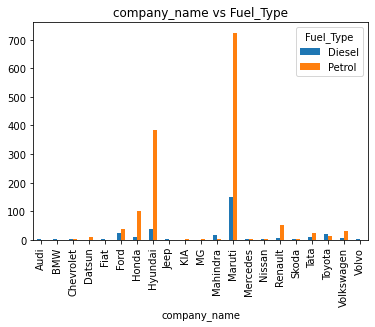

In [92]:
com_fuel.plot(kind = 'bar')
plt.title('company_name vs Fuel_Type')

In [93]:
com_owner = pd.crosstab(df['company_name'], df['Owner'])
com_owner

Owner,1st,2nd,3rd,4th
company_name,,,,
Audi,2,0,0,0
BMW,0,1,0,0
Chevrolet,4,2,0,0
Datsun,7,2,0,0
Fiat,1,0,0,0
Ford,47,14,1,0
Honda,74,31,3,1
Hyundai,292,111,19,1
Jeep,2,0,0,0


Text(0.5, 1.0, 'company_name vs owner')

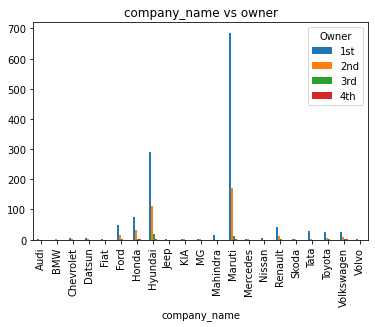

In [94]:

com_owner.plot(kind = 'bar')
plt.title('company_name vs owner')

### multivariate analysis

### pairplots

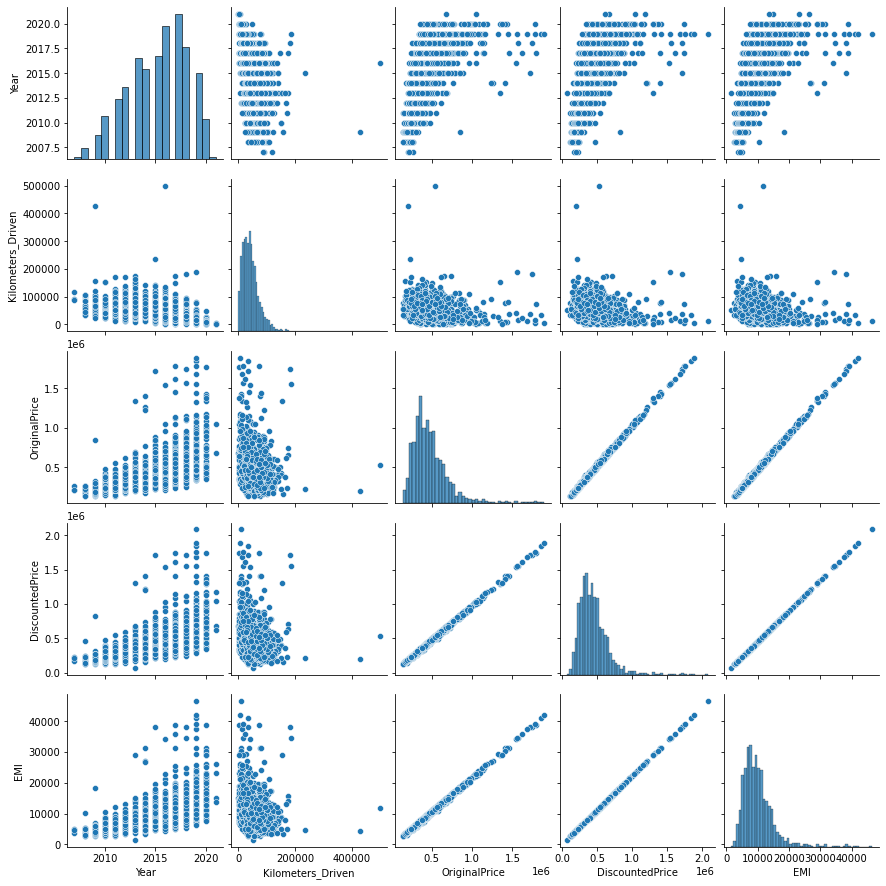

In [95]:
sns.pairplot(df)

### heatmap

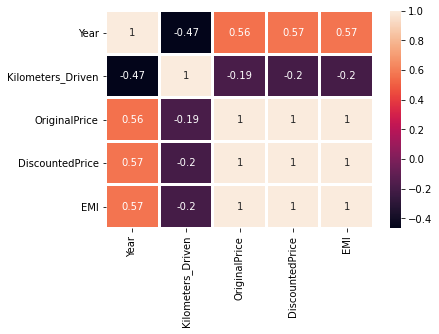

In [96]:
sns.heatmap(df.corr(),linecolor='white',linewidths=2,annot=True);

### comparsion of price difference according to the owner

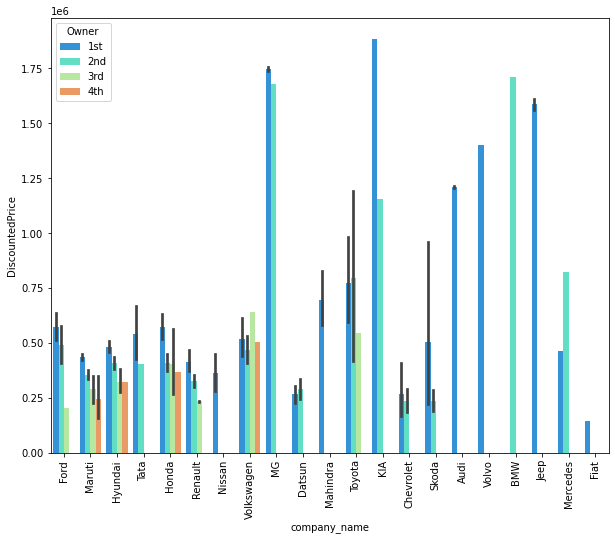

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(x='company_name',y='DiscountedPrice',data=df,hue='Owner', palette='rainbow')
plt.xticks(rotation=90);

### comparison of price difference according to the fuel type

In [98]:
df.columns

Index(['company_name', 'model_name', 'Year', 'Owner', 'Kilometers_Driven',
       'OriginalPrice', 'DiscountedPrice', 'Fuel_Type', 'EMI', 'Location'],
      dtype='object')

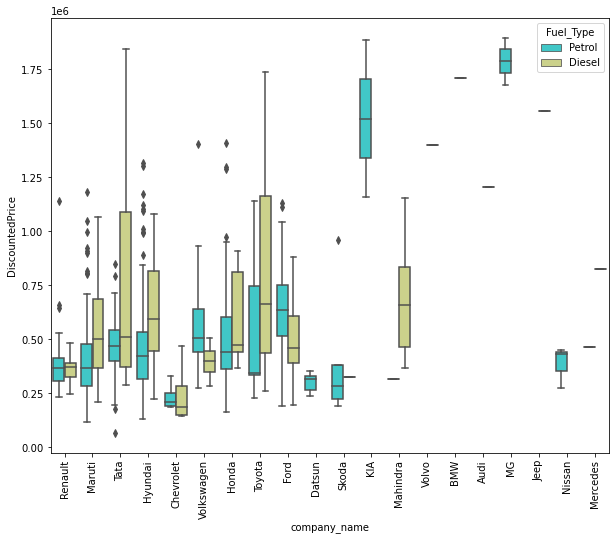

In [99]:
plt.figure(figsize=(10,8))
sns.boxplot(x='company_name',y='DiscountedPrice',data=df,hue='Fuel_Type', palette='rainbow')
plt.xticks(rotation=90);